In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv('tripadvisor_hotel_reviews.csv')

data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sviatoslavromankiv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sviatoslavromankiv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
def cleaning(text):
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

data['Review'] = data['Review'].apply(cleaning)

data.head()

,Review,Rating
0,nice hotel expensive park get good deal stay h...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room 4 experience hotel monaco seattle go...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay go seahawk game awesome ...,5


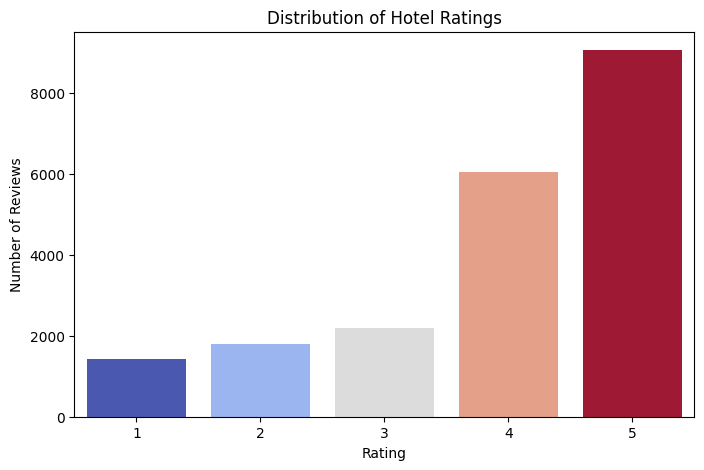

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=data, hue='Rating', palette='coolwarm', legend=False)
plt.title("Distribution of Hotel Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

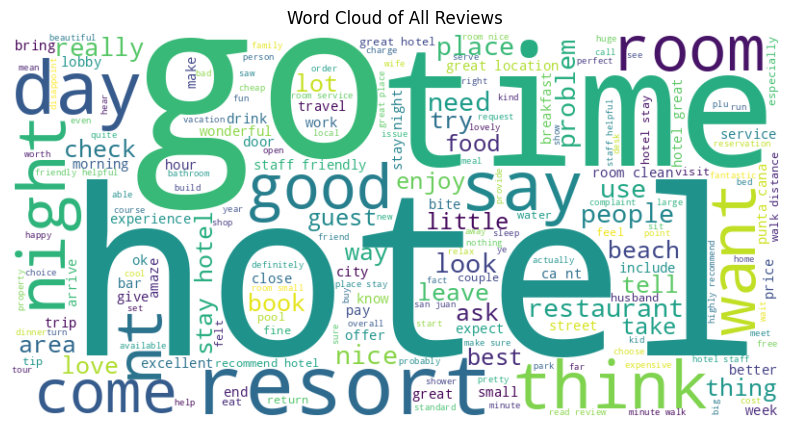

In [17]:
text = " ".join(review for review in data['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Reviews")
plt.show()

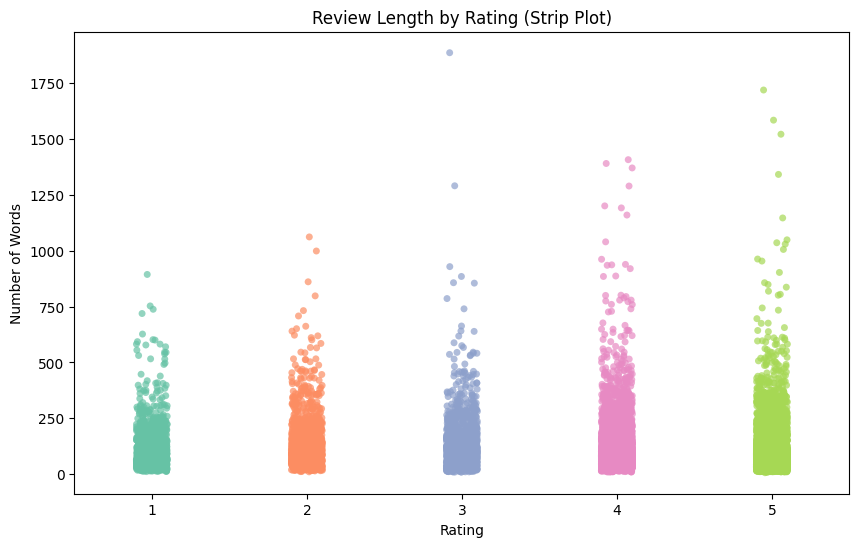

In [18]:
data['Review_Length'] = data['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.stripplot(x='Rating', y='Review_Length', data=data, hue='Rating',
              palette='Set2', jitter=True, alpha=0.7, legend=False)
plt.title("Review Length by Rating (Strip Plot)")
plt.xlabel("Rating")
plt.ylabel("Number of Words")
plt.show()

In [19]:
def assign_sentiment_by_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['True_Sentiment'] = data['Rating'].apply(assign_sentiment_by_rating)

data.head()

,Review,Rating,Review_Length,True_Sentiment
0,nice hotel expensive park get good deal stay h...,4,81,Positive
1,ok nothing special charge diamond member hilto...,2,237,Negative
2,nice room 4 experience hotel monaco seattle go...,3,211,Neutral
3,unique great stay wonderful time hotel monaco ...,5,86,Positive
4,great stay great stay go seahawk game awesome ...,5,180,Positive


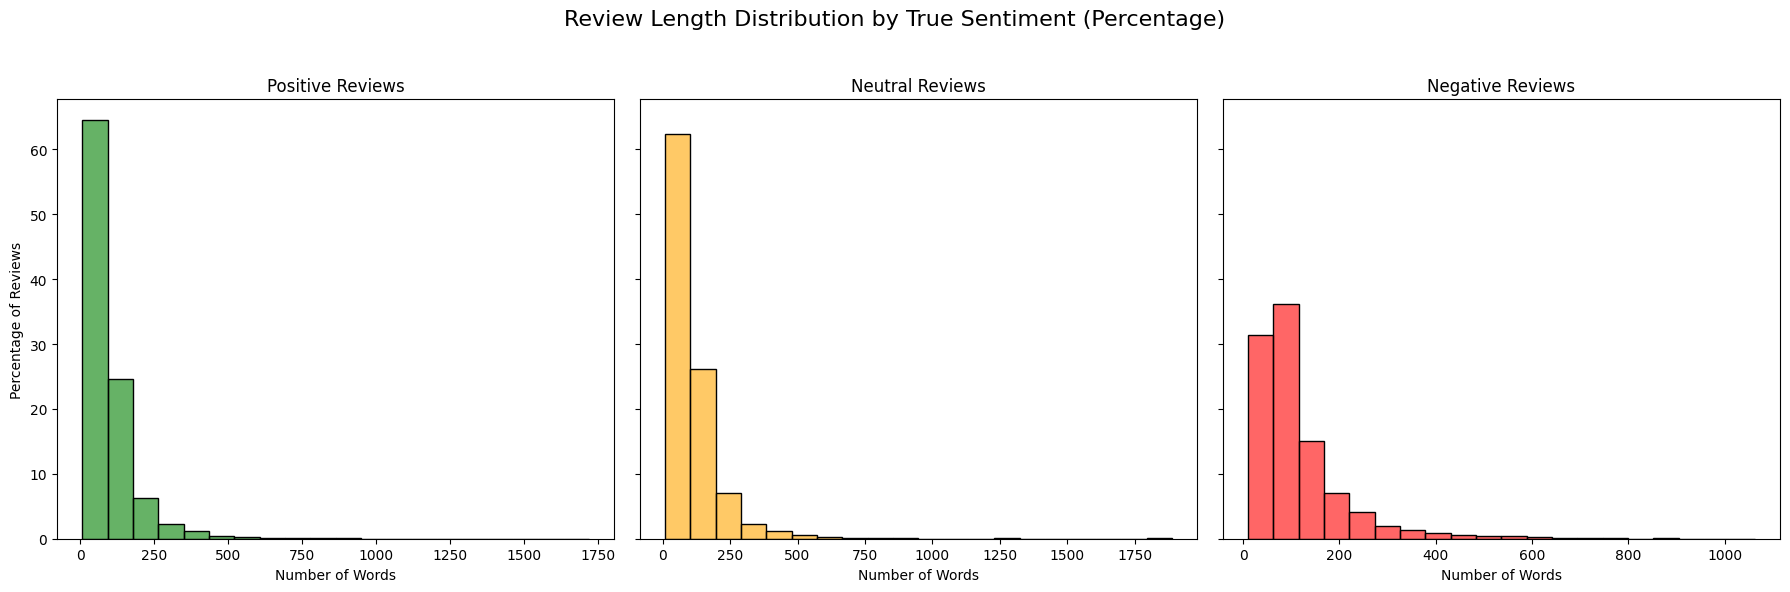

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sentiments = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'orange', 'red']

for i, sentiment in enumerate(sentiments):
    subset = data[data['True_Sentiment'] == sentiment]
    
    sns.histplot(subset['Review_Length'], bins=20, kde=False, stat='percent', ax=axs[i], color=colors[i], alpha=0.6)
    axs[i].set_title(f'{sentiment} Reviews')
    axs[i].set_xlabel('Number of Words')
    axs[i].set_ylabel('Percentage of Reviews')

plt.suptitle("Review Length Distribution by True Sentiment (Percentage)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

test_data = test_data.copy()
test_data['Sentiment_Scores'] = test_data['Review'].apply(lambda x: sia.polarity_scores(x))
test_data['Compound_Score'] = test_data['Sentiment_Scores'].apply(lambda x: x['compound'])

def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

test_data['Sentiment'] = test_data['Compound_Score'].apply(categorize_sentiment)

test_data[['Review', 'Sentiment_Scores', 'Compound_Score', 'Sentiment', 'True_Sentiment']].head(25)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sviatoslavromankiv/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review,Sentiment_Scores,Compound_Score,Sentiment,True_Sentiment
10726,recommend hotel reviewers actually stay hotel ...,"{'neg': 0.23, 'neu': 0.486, 'pos': 0.284, 'com...",0.4522,Positive,Negative
14919,barcelona rock stay hotel jazz girlfriend 3 ni...,"{'neg': 0.122, 'neu': 0.682, 'pos': 0.196, 'co...",0.9779,Positive,Positive
19098,ok hotel good location stay night way beijing ...,"{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...",0.9217,Positive,Neutral
2450,great service nice pool ok beach lovely ground...,"{'neg': 0.067, 'neu': 0.63, 'pos': 0.303, 'com...",0.9980,Positive,Positive
960,surprise treat spend weekend july 1516 2006 ca...,"{'neg': 0.042, 'neu': 0.652, 'pos': 0.306, 'co...",0.9816,Positive,Positive
17525,fantastic stay affinia 50 stay affinia 50 dece...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9879,Positive,Positive
13241,great choice stay argonaut 7th 10th sepember s...,"{'neg': 0.008, 'neu': 0.648, 'pos': 0.344, 'co...",0.9980,Positive,Positive
12134,treat good room glimpse bridge think room impe...,"{'neg': 0.228, 'neu': 0.444, 'pos': 0.328, 'co...",0.7717,Positive,Positive
15123,par price stay marco polo hotel 1 night novemb...,"{'neg': 0.045, 'neu': 0.878, 'pos': 0.077, 'co...",0.2960,Positive,Negative
18083,great value money tegal sari lovely hotel wife...,"{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...",0.9874,Positive,Positive


In [25]:
from sklearn.metrics import classification_report

print("Metrics by Sentiment Class:")
print(classification_report(test_data['True_Sentiment'], test_data['Sentiment'], target_names=['Negative', 'Neutral', 'Positive']))

Metrics by Sentiment Class:
              precision    recall  f1-score   support

    Negative       0.89      0.25      0.40       625
     Neutral       0.13      0.01      0.01       432
    Positive       0.78      1.00      0.87      3042

    accuracy                           0.78      4099
   macro avg       0.60      0.42      0.43      4099
weighted avg       0.73      0.78      0.71      4099



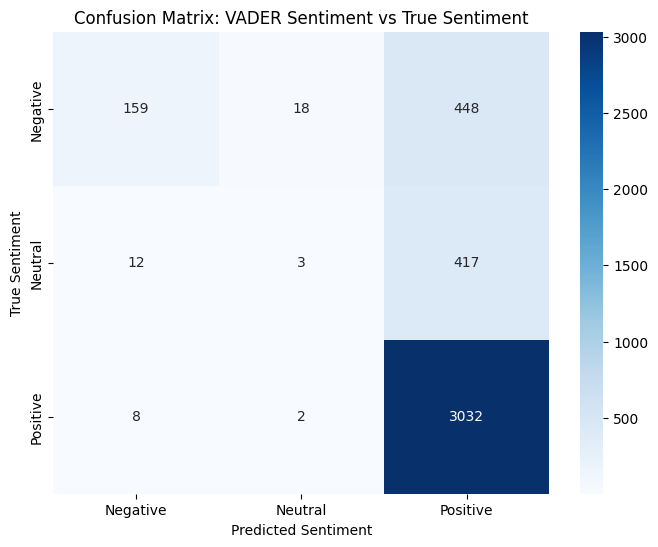

In [26]:
conf_matrix = confusion_matrix(test_data['True_Sentiment'], test_data['Sentiment'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix: VADER Sentiment vs True Sentiment')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(data['Review'])
y = data['True_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

test_reviews = data.loc[y_test.index]
results_df = pd.DataFrame({
    'Review': test_reviews['Review'].values,
    'True Sentiment': y_test.values,
    'Predicted Sentiment': y_pred
})

print("\n=== Sample Predictions (First 25) ===")
results_df.head(25)


=== Sample Predictions (First 25) ===


,Review,True Sentiment,Predicted Sentiment
0,recommend hotel reviewers actually stay hotel ...,Negative,Negative
1,barcelona rock stay hotel jazz girlfriend 3 ni...,Positive,Positive
2,ok hotel good location stay night way beijing ...,Neutral,Positive
3,great service nice pool ok beach lovely ground...,Positive,Positive
4,surprise treat spend weekend july 1516 2006 ca...,Positive,Positive
5,fantastic stay affinia 50 stay affinia 50 dece...,Positive,Positive
6,great choice stay argonaut 7th 10th sepember s...,Positive,Positive
7,treat good room glimpse bridge think room impe...,Positive,Positive
8,par price stay marco polo hotel 1 night novemb...,Negative,Positive
9,great value money tegal sari lovely hotel wife...,Positive,Positive


In [ ]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

=== Metrics ===
Accuracy:  0.8222
Precision: 0.7375
Recall:    0.8222
F1-score:  0.7689

=== Classification Report ===
              precision    recall  f1-score   support

    Negative       0.85      0.56      0.67       625
     Neutral       0.00      0.00      0.00       432
    Positive       0.82      0.99      0.90      3042

    accuracy                           0.82      4099
   macro avg       0.56      0.52      0.52      4099
weighted avg       0.74      0.82      0.77      4099



/Users/sviatoslavromankiv/Labs/nlp/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


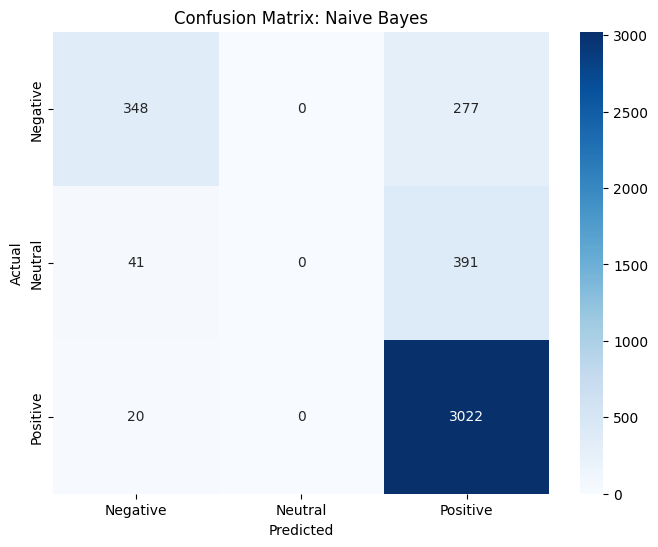

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Naive Bayes')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2
from sklearn.preprocessing import LabelBinarizer

X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['True_Sentiment'], test_size=0.2)

tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)

total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

Total distinct words: 65267


In [37]:
import pickle
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))
pickle.dump(lb, open('label.pkl', 'wb'))

In [40]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

Epoch 1/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 214s 415ms/step - accuracy: 0.6066 - loss: 1.0670 - val_accuracy: 0.7365 - val_loss: 0.8879
Epoch 2/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 235s 458ms/step - accuracy: 0.7328 - loss: 0.9109 - val_accuracy: 0.7365 - val_loss: 0.7795
Epoch 3/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 235s 458ms/step - accuracy: 0.7279 - loss: 0.8198 - val_accuracy: 0.7365 - val_loss: 0.6447
Epoch 4/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 220s 429ms/step - accuracy: 0.7428 - loss: 0.7306 - val_accuracy: 0.7365 - val_loss: 0.6413
Epoch 5/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 220s 428ms/step - accuracy: 0.7413 - loss: 0.6950 - val_accuracy: 0.7368 - val_loss: 0.5938
Epoch 6/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 207s 404ms/step - accuracy: 0.7613 - loss: 0.6481 - val_accuracy: 0.7704 - val_loss: 0.5538
Epoch 7/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 254s 496ms/step - accuracy: 0.7830 - loss: 0.6042 - val_accuracy: 0.8241 - val_loss: 0.5022
Epoch 8/25
513/513 ━━━━━━━━━━━━━━━━━━━━ 238s 462ms/step - accuracy: 0.8047 -

In [43]:
model.save("my_model.keras") 

<Axes: >

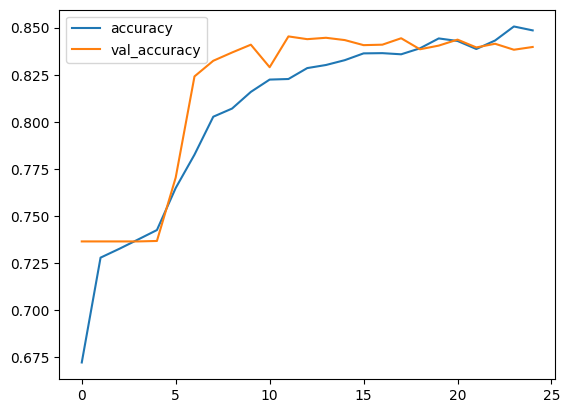

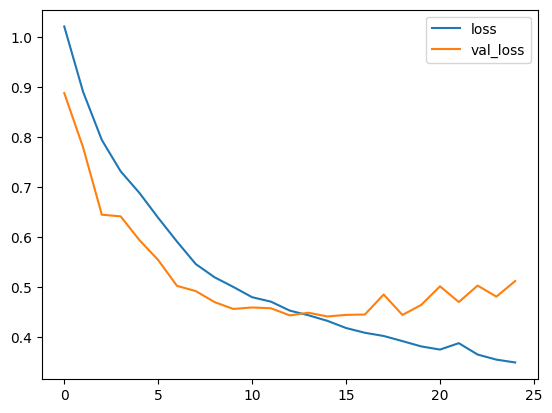

In [44]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

In [45]:
pred2 = model.predict(test_padded)

129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step


In [ ]:
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)

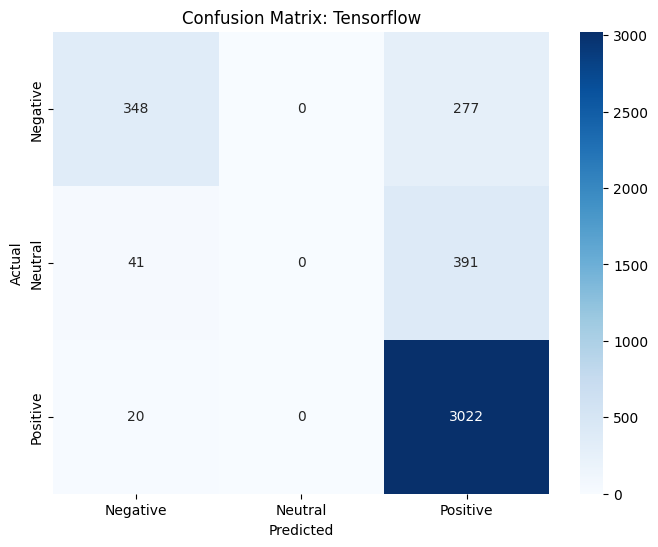

              precision    recall  f1-score   support

    Negative       0.62      0.82      0.71       671
     Neutral       0.33      0.01      0.01       409
    Positive       0.90      0.96      0.93      3019

    accuracy                           0.84      4099
   macro avg       0.62      0.59      0.55      4099
weighted avg       0.80      0.84      0.80      4099



In [62]:
cofn_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Tensorflow')
plt.show()

print(classification_report(true_labels, pred_labels, target_names=['Negative', 'Neutral', 'Positive']))

In [63]:
test_reviews = data.loc[y_test.index]
df = pd.DataFrame({
    'Review': test_reviews['Review'].values,
    'True_Sentiment': test_reviews['True_Sentiment'].values,
    'True Label': true_labels,
    'Predicted Label': pred_labels
})

df.head(35)

,Review,True_Sentiment,True Label,Predicted Label
0,perfect airport hotel amaze overnighted ways v...,Positive,2,2
1,excellent tourist hotel spend 4 nights week re...,Positive,2,2
2,exceptional experience intercontinental san ju...,Positive,2,2
3,blast get week breeze punta cana wonderful tim...,Positive,2,2
4,dirty budget bed bug stay good friend 7 days j...,Negative,0,0
5,second trip paradisus second trip paradisus pu...,Positive,2,2
6,stay essencefest husband stay avenue garden ho...,Positive,2,2
7,average 3 star hotel location ideal standards ...,Positive,2,0
8,good choice excellent location close touristic...,Positive,2,2
9,stay reviewers state room quite small design f...,Positive,2,2
